# Michele Banfi 869294

The aim of the exercise is to create and use the grover algorithm; composed of the oracle and the diffuser. In the last part of the exercise we can demostrate the approximate number of iterations needed for a good results.

In [5]:
# import libraries
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def diffuser(qc, n):
    qc.h(range(n))
    qc.x(range(n))
    qc.mcp(np.pi, list(range(n-1)), n-1)
    qc.x(range(n))
    qc.h(range(n))

In [7]:
def oracle(qc, n, target):
    for i in range(len(target)):
        if target[i] == '0':
            qc.x(i)
    qc.mcp(np.pi, list(range(n-1)), n-1)
    for i in range(len(target)):
        if target[i] == '0':
            qc.x(i)

In [10]:
def circuit(n, target):

    target_bin = np.binary_repr(target, n)
    
    qc = QuantumCircuit(n)

    qc.h(range(n))
    
    qc.barrier()
    
    # oracle
    oracle(qc, n, target_bin)
    
    qc.barrier()
    
    # diffuser
    diffuser(qc, n)
    
    qc.measure_all()

    return qc

In [11]:
def run_circuit(n, target):
    qc = circuit(n, target)
    target_bin = np.binary_repr(target, n)
    result = Sampler().run([qc], shots=100).result()[0]
    co = result.data.meas.get_counts()
    # reverse target bin
    target_bin = target_bin[::-1]
    p = co[target_bin] / sum(co.values())
    return p

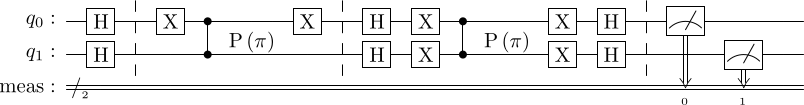

In [12]:
# we can plot the circuit
circuit_drawer(circuit(2, 1), output='latex')

In [13]:
results = []
for i in range(2, 10):
    results.append(run_circuit(i, 1))

Text(0, 0.5, 'Probability')

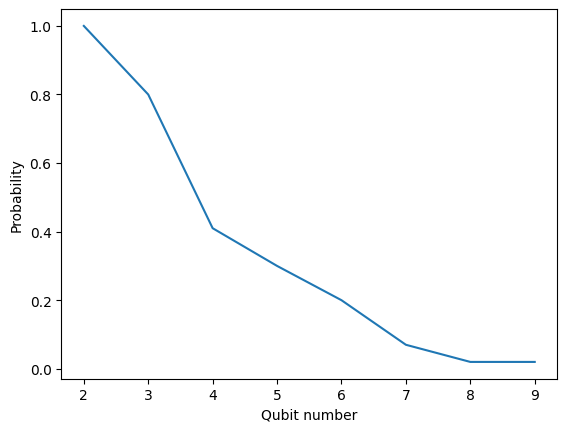

In [14]:
plt.plot(range(2, 10), results)
plt.xlabel('Qubit number')
plt.ylabel('Probability')

In [15]:
def circuit(n, target, reps):
    
    target_bin = np.binary_repr(target, n)
    
    qc = QuantumCircuit(n)

    qc.h(range(n))
    
    qc.barrier()
    
    for _ in range(reps):
        # oracle
        oracle(qc, n, target_bin)
        
        # diffuser
        diffuser(qc, n)
    
    qc.measure_all()
    
    result = Sampler().run([qc], shots=100).result()[0]
    co = result.data.meas.get_counts()

    maxim = max(co.values())
    print(maxim, "with reps", reps)
    return maxim
    # return p

In [24]:
results = []
for i in range(2, 30):
    results.append(circuit(7, 1, i))

21 with reps 2
34 with reps 3
50 with reps 4
70 with reps 5
87 with reps 6
90 with reps 7
100 with reps 8
98 with reps 9
88 with reps 10
70 with reps 11
63 with reps 12
49 with reps 13
22 with reps 14
12 with reps 15
6 with reps 16
5 with reps 17
3 with reps 18
14 with reps 19
20 with reps 20
37 with reps 21
66 with reps 22
73 with reps 23
95 with reps 24
98 with reps 25
100 with reps 26
99 with reps 27
89 with reps 28
75 with reps 29


Text(0, 0.5, 'Probability')

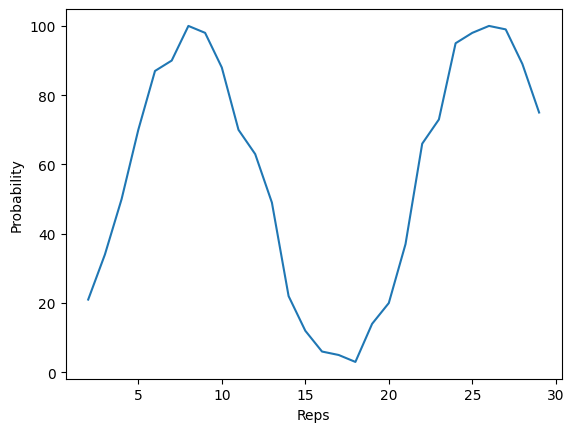

In [26]:
plt.plot(range(2, 30), results)
plt.xlabel('Reps')
plt.ylabel('Probability')